## Step 1: Load Your Dataset

In [1]:
import pandas as pd

train = pd.read_csv("cleaned_merge_dataset_folder/pure_train_merge_dataset.csv")
test = pd.read_csv("cleaned_merge_dataset_folder/pure_test_merge_dataset.csv")

C:\Users\siddh\AppData\Local\Temp\ipykernel_9308\492387988.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("cleaned_merge_dataset_folder/pure_train_merge_dataset.csv")


###### import → A special Python keyword to bring in tools/libraries

###### pandas → A powerful Python library that lets you work with data tables (like Excel or CSV)

###### as pd → Gives pandas a short nickname. So now instead of writing pandas.read_csv(), you can write pd.read_csv() — which is easier and faster

###### pd.read_csv() → This function reads a CSV file from your folder into a DataFrame (which is a table in memory)

###### "merged_train.csv" → The name of the train file you created after merging

###### train = ... → This stores the loaded table into a variable named train so you can use it later in your code



## Step 2: View the Shape and Columns

In [2]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (1000000, 20)
Test shape: (3370464, 13)


###### train.shape → Returns a tuple like (rows, columns) → Tells how many rows and columns your dataset has

###### print(...) → Just displays the result in your output

##### 💡 Why do this?
###### To quickly know how big your dataset is — for example:

###### If train.shape = (300000, 20) → you have 300K rows and 20 columns.

In [3]:
print("Train columns name :", train.columns.tolist())
print("Test columns name :", test.columns.tolist())

Train columns name : ['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'Day_type', 'locale', 'locale_name', 'description', 'transferred', 'family', 'class', 'perishable', 'dcoilwtico', 'city', 'state', 'store_grade', 'cluster', 'transactions']
Test columns name : ['id', 'date', 'store_nbr', 'item_nbr', 'onpromotion', 'family', 'class', 'perishable', 'dcoilwtico', 'city', 'state', 'store_grade', 'cluster']


##### Explanation:
###### ✅ train.columns → Shows all the column names

###### ✅ .tolist() → Converts those names into a Python list, which is easier to read

###### ✅ \n → Adds a blank line before the output for better formatting

##### 💡 Why do this?
###### To get a quick overview of what features (columns) you have to work with.



In [4]:
print("Train first 5 rows", train.head(50))
print("Test first 5 rows", test.head())

Train first 5 rows     id        date  store_nbr  item_nbr  unit_sales  onpromotion Day_type  \
0    0  2013-01-01         25    103665       7.000        False  Holiday   
1    1  2013-01-01         25    105574       1.000        False  Holiday   
2    2  2013-01-01         25    105575       2.000        False  Holiday   
3    3  2013-01-01         25    108079       1.000        False  Holiday   
4    4  2013-01-01         25    108701       1.000        False  Holiday   
5    5  2013-01-01         25    108786       3.000        False  Holiday   
6    6  2013-01-01         25    108797       1.000        False  Holiday   
7    7  2013-01-01         25    108952       1.000        False  Holiday   
8    8  2013-01-01         25    111397      13.000        False  Holiday   
9    9  2013-01-01         25    114790       3.000        False  Holiday   
10  10  2013-01-01         25    114800       1.000        False  Holiday   
11  11  2013-01-01         25    115267       1.000      

##### Explanation:
###### ✅ train.head() → Shows the first 5 rows of the table. It helps you preview the actual data in the dataset.

###### ✅ \n → Adds a line break in the printout

###### ✅ print(...) → Shows your results

##### 💡 Why do this?
###### To visually inspect how your data looks — this helps you spot obvious problems like missing values, wrong formatting, or strange values.

### Step 3: Check for Missing Values
##### Goal: Find out which columns have empty/missing values (NaN), how many, and decide what to do next.

In [5]:
print("Train missing value", train.isnull().sum())
print("Test missing value",test.isnull().sum())

Train missing value id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
Day_type        0
locale          0
locale_name     0
description     0
transferred     0
family          0
class           0
perishable      0
dcoilwtico      0
city            0
state           0
store_grade     0
cluster         0
transactions    0
dtype: int64
Test missing value id             0
date           0
store_nbr      0
item_nbr       0
onpromotion    0
family         0
class          0
perishable     0
dcoilwtico     0
city           0
state          0
store_grade    0
cluster        0
dtype: int64


##### train.isnull()
###### ✅ train → This is your DataFrame (table).

###### ✅ .isnull() → This checks every cell in the dataset.

###### If the value is missing, it returns True.

###### If the value is present, it returns False.

###### So the result is a giant table of True and False.

In [6]:
# Checking again for train that is there any missing value in any columns or rows

print("check after removing missing value", train.isnull().sum())


check after removing missing value id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
Day_type        0
locale          0
locale_name     0
description     0
transferred     0
family          0
class           0
perishable      0
dcoilwtico      0
city            0
state           0
store_grade     0
cluster         0
transactions    0
dtype: int64


### Step 4: Check for Duplicate Rows in my train and test datasets.

##### Duplicate rows mean the exact same row appears more than once in your dataset.

##### Problem if duplicates exist
###### ✅ They don’t give new information
###### ❌ They can mislead your model
###### 📉 They reduce model accuracy

In [7]:
print("Check duplicates value in train rows :\n", train.duplicated().sum())
print("Check duplicates value in test rows :\n", test.duplicated())

Check duplicates value in train rows :
 0
Check duplicates value in test rows :
 0          False
1          False
2          False
3          False
4          False
           ...  
3370459    False
3370460    False
3370461    False
3370462    False
3370463    False
Length: 3370464, dtype: bool


##### train.duplicated()
###### ✅ train → Your full table

###### ✅ .duplicated() → This checks every row.

###### If the row is an exact copy of a previous one, it returns True.

###### If it’s unique, it returns False.

###### 🧠 So it creates a list like: [False, False, True, False, True...]

###### ✅ .sum() → Counts how many True values are there (i.e., how many duplicated rows exist)

###### You get an integer like 245 — that means 245 rows are duplicates.



In [8]:
print("Column duplicated for train ", train.columns[train.columns.duplicated()])
print("Columns duplicated for test ", test.columns[test.columns.duplicated()])

Column duplicated for train  Index([], dtype='object')
Columns duplicated for test  Index([], dtype='object')


### Step 5 Goal:
##### To understand each column, what kind of values it contains, and whether the values make sense.

##### This helps you answer:

##### 🧠 What does each column mean?

##### 🧐 What types of data are there (text, number, date)?

##### 🔍 Are the values valid? Any weird, unexpected values?

##### 1. View Data Types of Each Column

In [9]:
print("Data type of train \n", train.dtypes) # tolist() shows data in list forms
print("Data type of test \n", test.dtypes)

Data type of train 
 id                int64
date             object
store_nbr         int64
item_nbr          int64
unit_sales      float64
onpromotion        bool
Day_type         object
locale           object
locale_name      object
description      object
transferred      object
family           object
class             int64
perishable        int64
dcoilwtico      float64
city             object
state            object
store_grade      object
cluster           int64
transactions      int64
dtype: object
Data type of test 
 id               int64
date            object
store_nbr        int64
item_nbr         int64
onpromotion       bool
family          object
class            int64
perishable       int64
dcoilwtico     float64
city            object
state           object
store_grade     object
cluster          int64
dtype: object


In [10]:
print(train['Day_type'].unique())

['Holiday' 'Unknown' 'Work Day']


##### 2. View Unique Values in Each Column

In [11]:
# for train data type

for col in train.columns[:30]:
    print(f"this is all uniuqe value in :{col}")
    print(train[col].unique())
    print(train[col].dtypes,"\n\n")
    
    

this is all uniuqe value in :id
[     0      1      2 ... 999997 999998 999999]
int64 


this is all uniuqe value in :date
['2013-01-01' '2013-01-02' '2013-01-03' '2013-01-04' '2013-01-05'
 '2013-01-06' '2013-01-07' '2013-01-08' '2013-01-09' '2013-01-10'
 '2013-01-11' '2013-01-12' '2013-01-13' '2013-01-14' '2013-01-15'
 '2013-01-16' '2013-01-17' '2013-01-18' '2013-01-19' '2013-01-20'
 '2013-01-21' '2013-01-22' '2013-01-23' '2013-01-24' '2013-01-25'
 '2013-01-26']
object 


this is all uniuqe value in :store_nbr
[25  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 23 24 26 27
 28 30 31 32 33 34 35 37 38 39 40 41 43 44 45 46 47 48 49 50 51 54]
int64 


this is all uniuqe value in :item_nbr
[ 103665  105574  105575 ... 1114924 1114903  830829]
int64 


this is all uniuqe value in :unit_sales
[ 7.     1.     2.    ... 29.947 26.234 67.152]
float64 


this is all uniuqe value in :onpromotion
[False]
bool 


this is all uniuqe value in :Day_type
['Holiday' 'Unknown' 'Work Day']
objec

In [12]:
import numpy as np

# Example
train['transferred'] = train['transferred'].map({
    'False': False,
    False: False,
    'Unknown': False   # or False if you prefer
})


In [13]:
train['transferred'].dtypes
train['transferred'].unique()

array([False])

## Convert object dtype into category

In [14]:
train['Day_type'] = train['Day_type'].astype('category')
train['locale'] = train['locale'].astype('category')
train['locale_name'] = train['locale_name'].astype('category')
train['description'] = train['description'].astype('category')
train['family'] = train['family'].astype('category')
train['city'] = train['city'].astype('category')
train['state'] = train['state'].astype('category')
#train['city_state'] = train['city_state'].astype('category')


In [15]:
train.dtypes

id                 int64
date              object
store_nbr          int64
item_nbr           int64
unit_sales       float64
onpromotion         bool
Day_type        category
locale          category
locale_name     category
description     category
transferred         bool
family          category
class              int64
perishable         int64
dcoilwtico       float64
city            category
state           category
store_grade       object
cluster            int64
transactions       int64
dtype: object

In [16]:
for col in test.columns[:10]:
    print(f"column name: {col}")
    print(test[col].unique())
    print(test[col].dtypes,"\n\n")

column name: id
[125497040 125497041 125497042 ... 128867501 128867502 128867503]
int64 


column name: date
['2017-08-16' '2017-08-17' '2017-08-18' '2017-08-19' '2017-08-20'
 '2017-08-21' '2017-08-22' '2017-08-23' '2017-08-24' '2017-08-25'
 '2017-08-26' '2017-08-27' '2017-08-28' '2017-08-29' '2017-08-30'
 '2017-08-31']
object 


column name: store_nbr
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]
int64 


column name: item_nbr
[  96995   99197  103501 ... 2132945 2132957 2134244]
int64 


column name: onpromotion
[False  True]
bool 


column name: family
['GROCERY I' 'CLEANING' 'BREAD/BAKERY' 'DELI' 'POULTRY' 'EGGS'
 'PERSONAL CARE' 'LINGERIE' 'BEVERAGES' 'AUTOMOTIVE' 'DAIRY' 'GROCERY II'
 'MEATS' 'FROZEN FOODS' 'HOME APPLIANCES' 'SEAFOOD' 'LIQUOR,WINE,BEER'
 'HARDWARE' 'LAWN AND GARDEN' 'PRODUCE' 'HOME AND KITCHEN II'
 'HOME AND KITCHEN I' 'MAGAZINES' 'HOME CARE' 'P

In [17]:
test['city'] = test['city'].astype('category')
test['state'] = test['state'].astype('category')

#### 🔍 Explanation:
##### for col in train.columns[:10]: → Loop over the first 10 columns in the dataset

##### train[col].unique() → Shows all the unique values in that column

#### 🧠 Helps you:

##### Understand what values are present

##### Spot things like typos, weird categories, or unexpected symbols



#### 3. Value Counts for Categorical Columns



In [18]:
for col in train.select_dtypes(include='int').columns:
    print(f"all the columns are {col}")
    print(train[col].value_counts())

all the columns are id
id
999983    1
999982    1
999981    1
999980    1
999979    1
         ..
4         1
3         1
2         1
1         1
0         1
Name: count, Length: 1000000, dtype: int64
all the columns are store_nbr
store_nbr
3     29792
44    29630
47    29103
45    29016
8     28975
46    27863
6     27575
48    26657
50    26536
49    26507
2     26410
24    25812
7     25668
37    25650
51    25636
4     25503
5     25310
38    24570
9     24292
1     23496
27    22787
39    22388
11    22353
23    22166
41    21002
18    20693
34    20505
25    20071
28    19673
31    19631
26    18482
17    18149
16    17504
33    17343
15    17092
12    16820
14    16703
40    16683
10    15883
13    15654
19    15364
43    15142
30    14358
54    13702
35    13095
32    12756
Name: count, dtype: int64
all the columns are item_nbr
item_nbr
587069     1140
559870     1140
502331     1139
839363     1139
222879     1138
           ... 
871600        8
586423        4
946277        2

In [19]:
# for test 

for col in test.select_dtypes(include='object').columns:
    print(f"columns name: {col}")
    print(test[col].value_counts())

columns name: date
date
2017-08-16    210654
2017-08-17    210654
2017-08-18    210654
2017-08-19    210654
2017-08-20    210654
2017-08-21    210654
2017-08-22    210654
2017-08-23    210654
2017-08-24    210654
2017-08-25    210654
2017-08-26    210654
2017-08-27    210654
2017-08-28    210654
2017-08-29    210654
2017-08-30    210654
2017-08-31    210654
Name: count, dtype: int64
columns name: family
family
GROCERY I                     1103328
BEVERAGES                      483840
CLEANING                       378432
PRODUCE                        260928
DAIRY                          195264
PERSONAL CARE                  127872
BREAD/BAKERY                   113184
HOME CARE                       90720
DELI                            77760
MEATS                           70848
HOME AND KITCHEN I              64800
LIQUOR,WINE,BEER                55296
POULTRY                         46656
FROZEN FOODS                    46656
HOME AND KITCHEN II             37152
EGGS            

##### Explanation:
##### train.select_dtypes(include='object') → Selects only text columns

##### .columns → Gets the names of those columns

##### .value_counts() → Tells how often each unique value appears

##### 🧠 Why use this?

##### To understand category distributions like type_y, locale, description

##### Helps you spot imbalance or strange values (like 'Holiday ', ' holiday', etc.)

#### End

#### Drop those columns which are not useful

In [20]:
#train = train.drop('id', axis=1)
#test = test.drop('id',axis=1)

#### Convert the date column into datetime format

In [21]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [22]:
print("unique value of onpromotion", train['onpromotion'].unique())
print("Unique values of onpromotion", test['onpromotion'].unique())

unique value of onpromotion [False]
Unique values of onpromotion [False  True]


### Step 6 Data Visualization

#### Goal: To see data with my eyes — like graphs, charts, and pictures — so i can understand patterns, trends, and problems.

# Train

In [23]:
import matplotlib.pyplot as plt

### Group by date

In [24]:
date_wise_sale = train.groupby('date')['unit_sales'].sum()

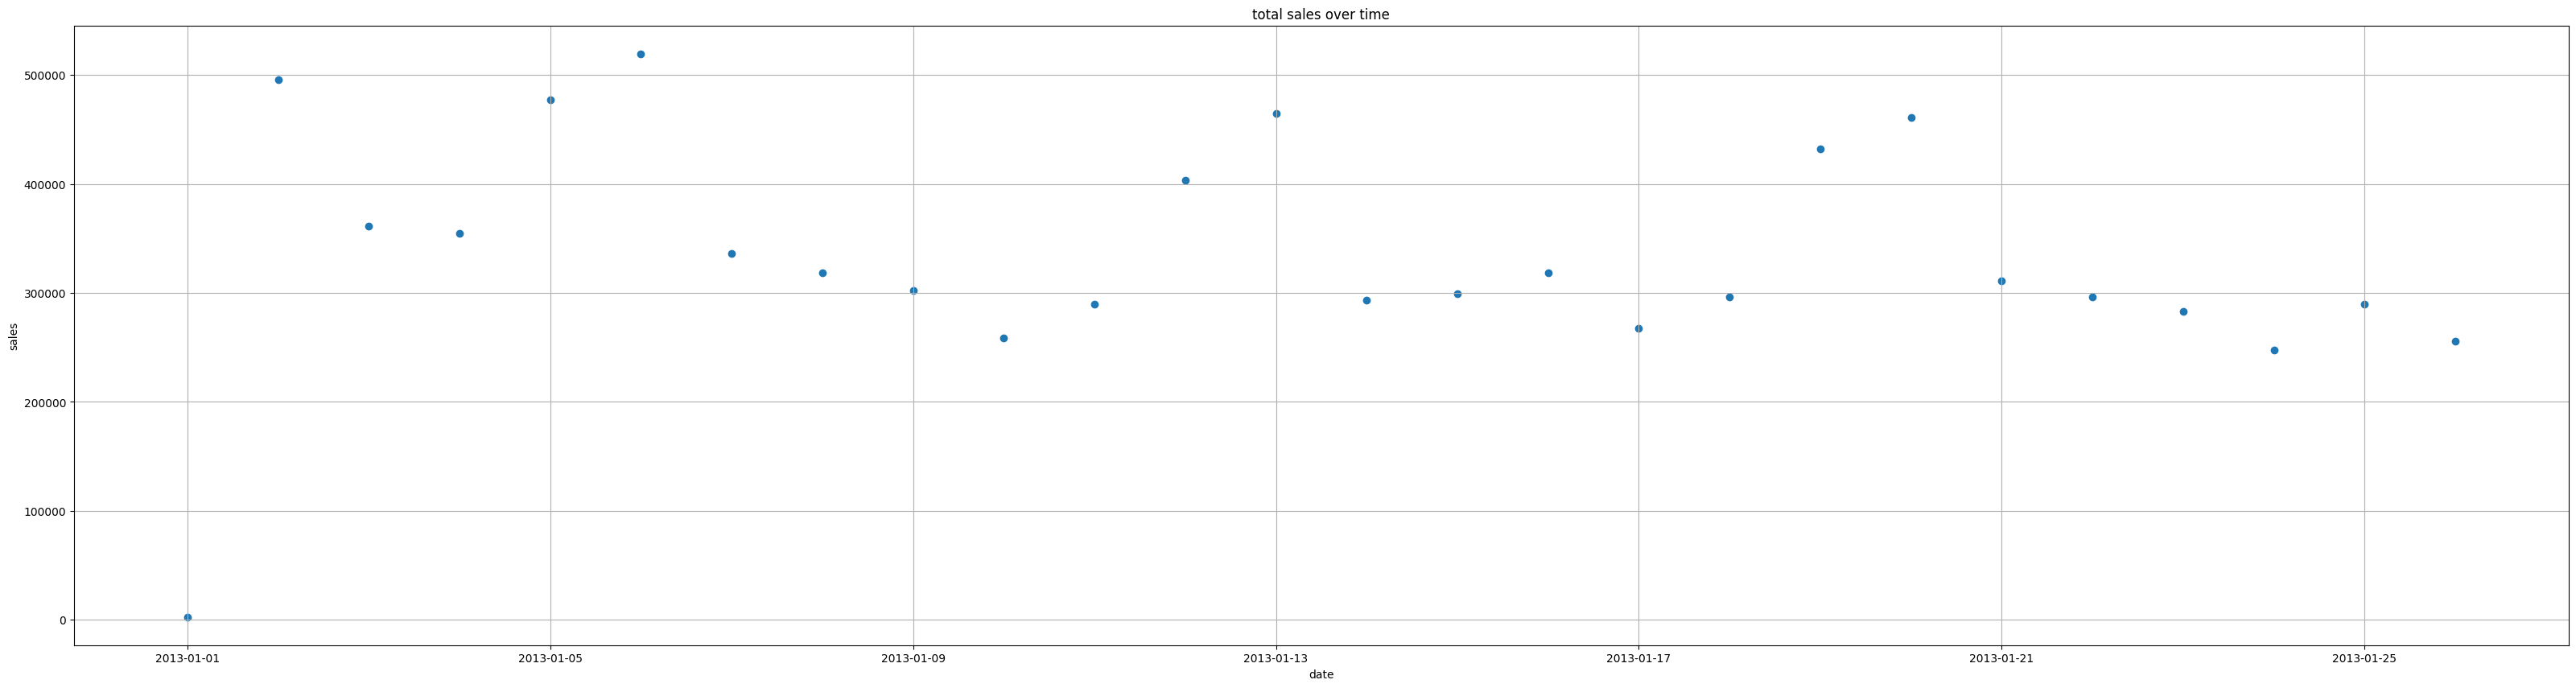

In [25]:
plt.figure(figsize=(40,10))
plt.scatter(date_wise_sale.index, date_wise_sale.values)
plt.title("total sales over time")
plt.xlabel('date')
plt.ylabel('sales')
plt.grid(True)
plt.show()

### Code	  ----        What it means
#### plt.figure(figsize=(12, 6))	----  Make a big blank canvas to draw on — 12 inches wide, 6 tall
#### plt.plot(x, y)	----  Draw a line chart with x = dates and y = total sales
#### daily_sales.index ----	This is the list of dates (x-axis)
#### daily_sales.values ----	These are the total sales for each day (y-axis)
#### plt.title(...)	---- Give the graph a name at the top
#### plt.xlabel(...)	---- Label the bottom (x-axis) with "Date"
#### plt.ylabel(...)	---- Label the side (y-axis) with "Total Unit Sales"
#### plt.grid(True)	---- Add dotted lines behind the chart to make it easier to read
#### plt.show()	---- 📢 Show the final graph on the screen!

### Group by family item

In [26]:
family_item_wise_sale = train.groupby('family')['unit_sales'].sum().sort_values(ascending=False)

C:\Users\siddh\AppData\Local\Temp\ipykernel_9308\428874906.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  family_item_wise_sale = train.groupby('family')['unit_sales'].sum().sort_values(ascending=False)


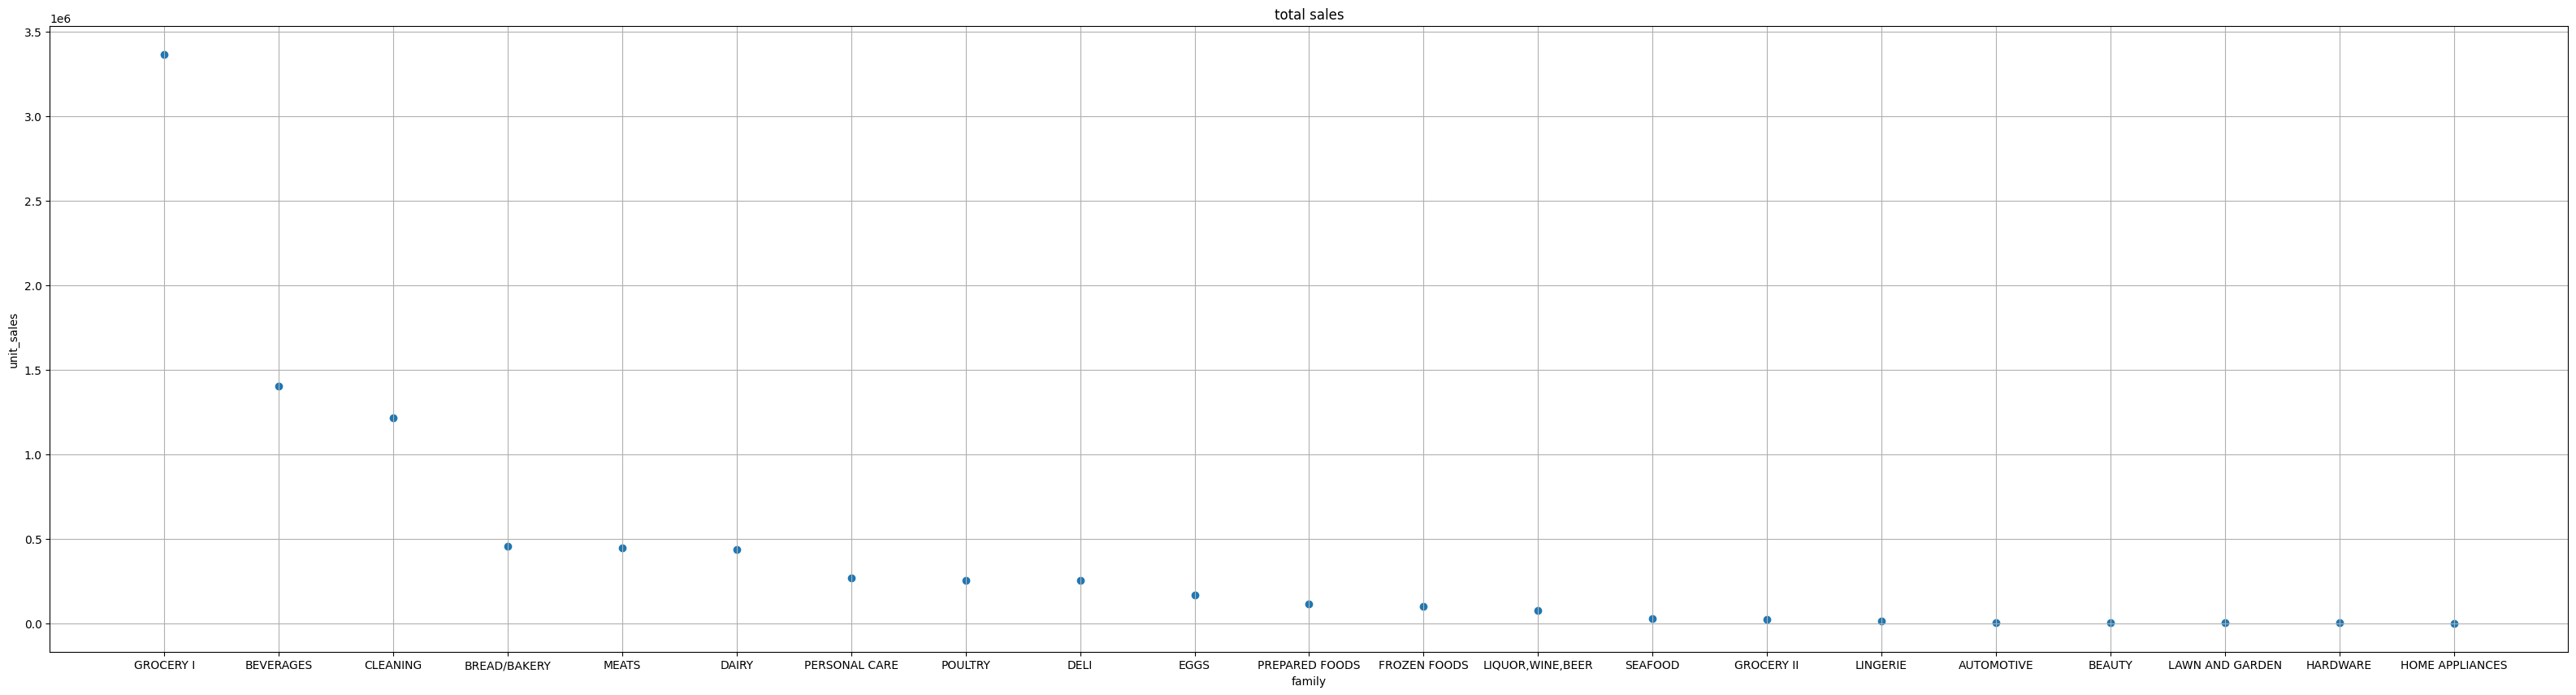

In [27]:
plt.figure(figsize=(40,10))
plt.scatter(family_item_wise_sale.index,family_item_wise_sale.values)
#family_item_wise_sale.plot(kind='pie')
plt.title('total sales')
plt.xlabel('family')
plt.ylabel('unit_sales')
plt.grid()
plt.show()

### Applying different types of graph on same data

<Axes: xlabel='family'>

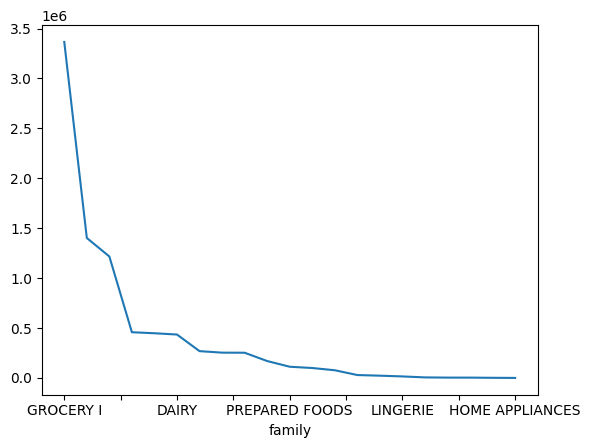

In [28]:
family_item_wise_sale.plot(kind='line')

## Store data
### Groupby Store_nbr

In [29]:
store_wise_sale = train.groupby('store_nbr')['unit_sales'].sum().sort_values(ascending=False)

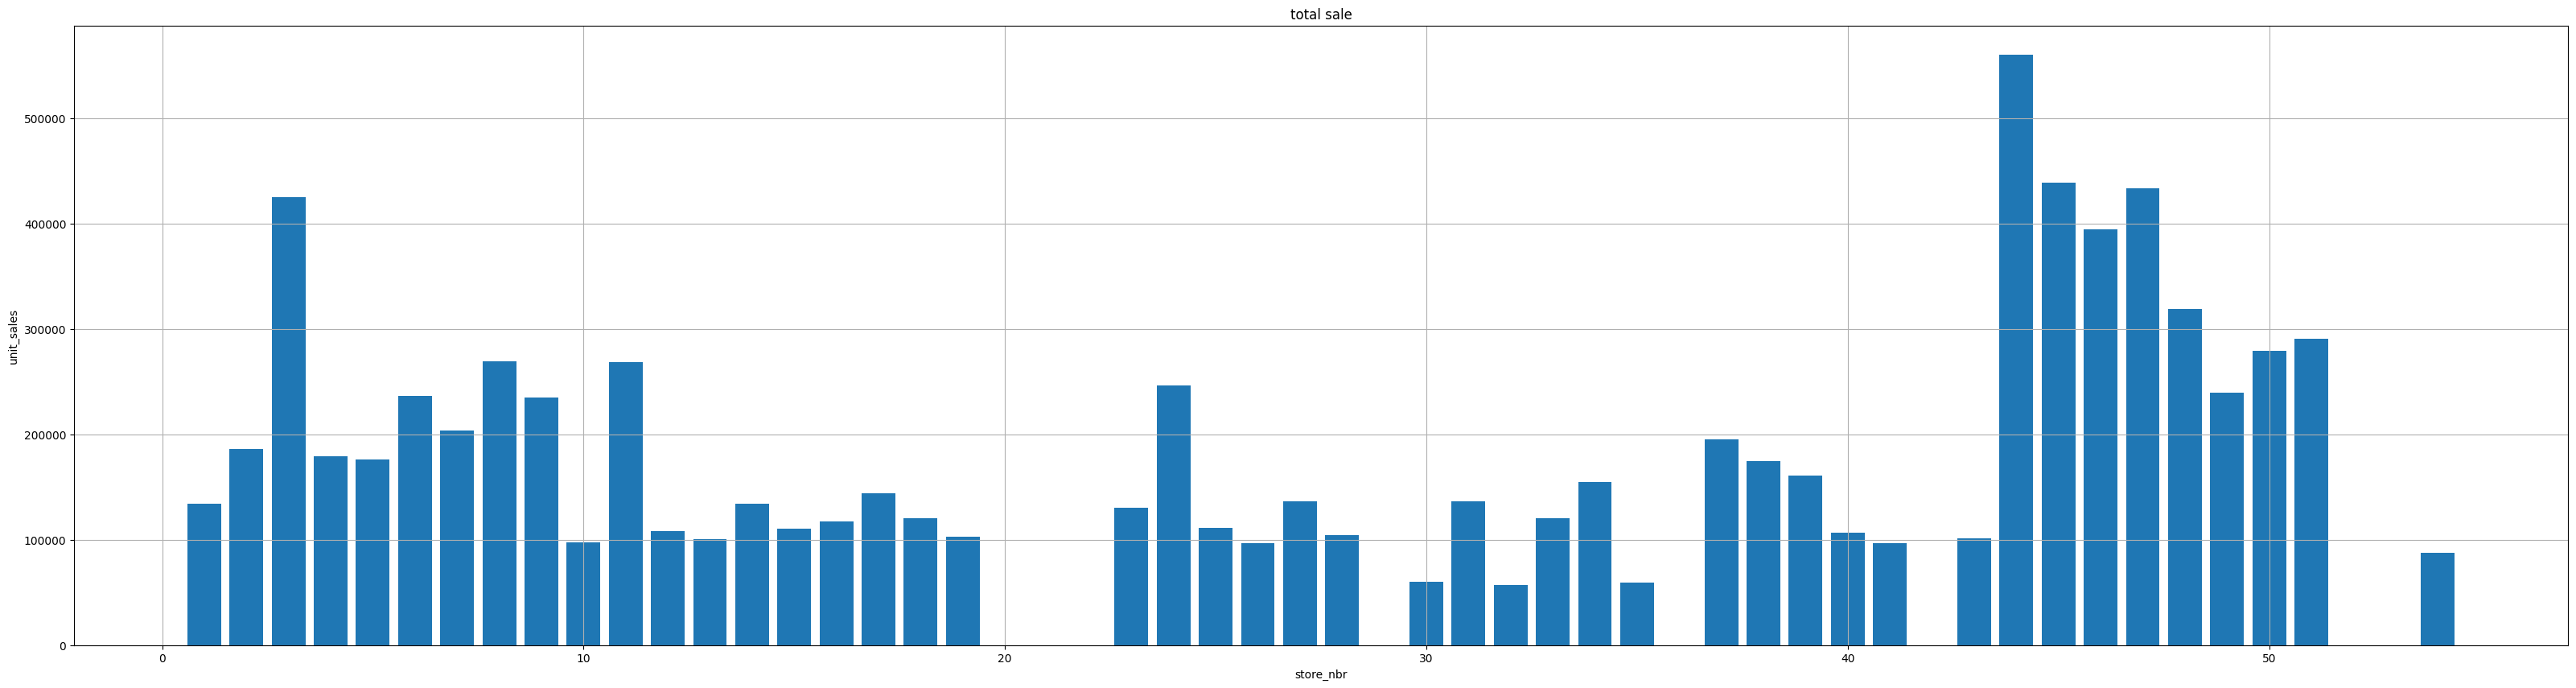

In [30]:
plt.figure(figsize=(40,10))
plt.bar(store_wise_sale.index,store_wise_sale.values)
plt.title('total sale')
plt.xlabel('store_nbr')
plt.ylabel('unit_sales')
plt.grid()
plt.show()

### Alternative method

<Axes: xlabel='store_nbr'>

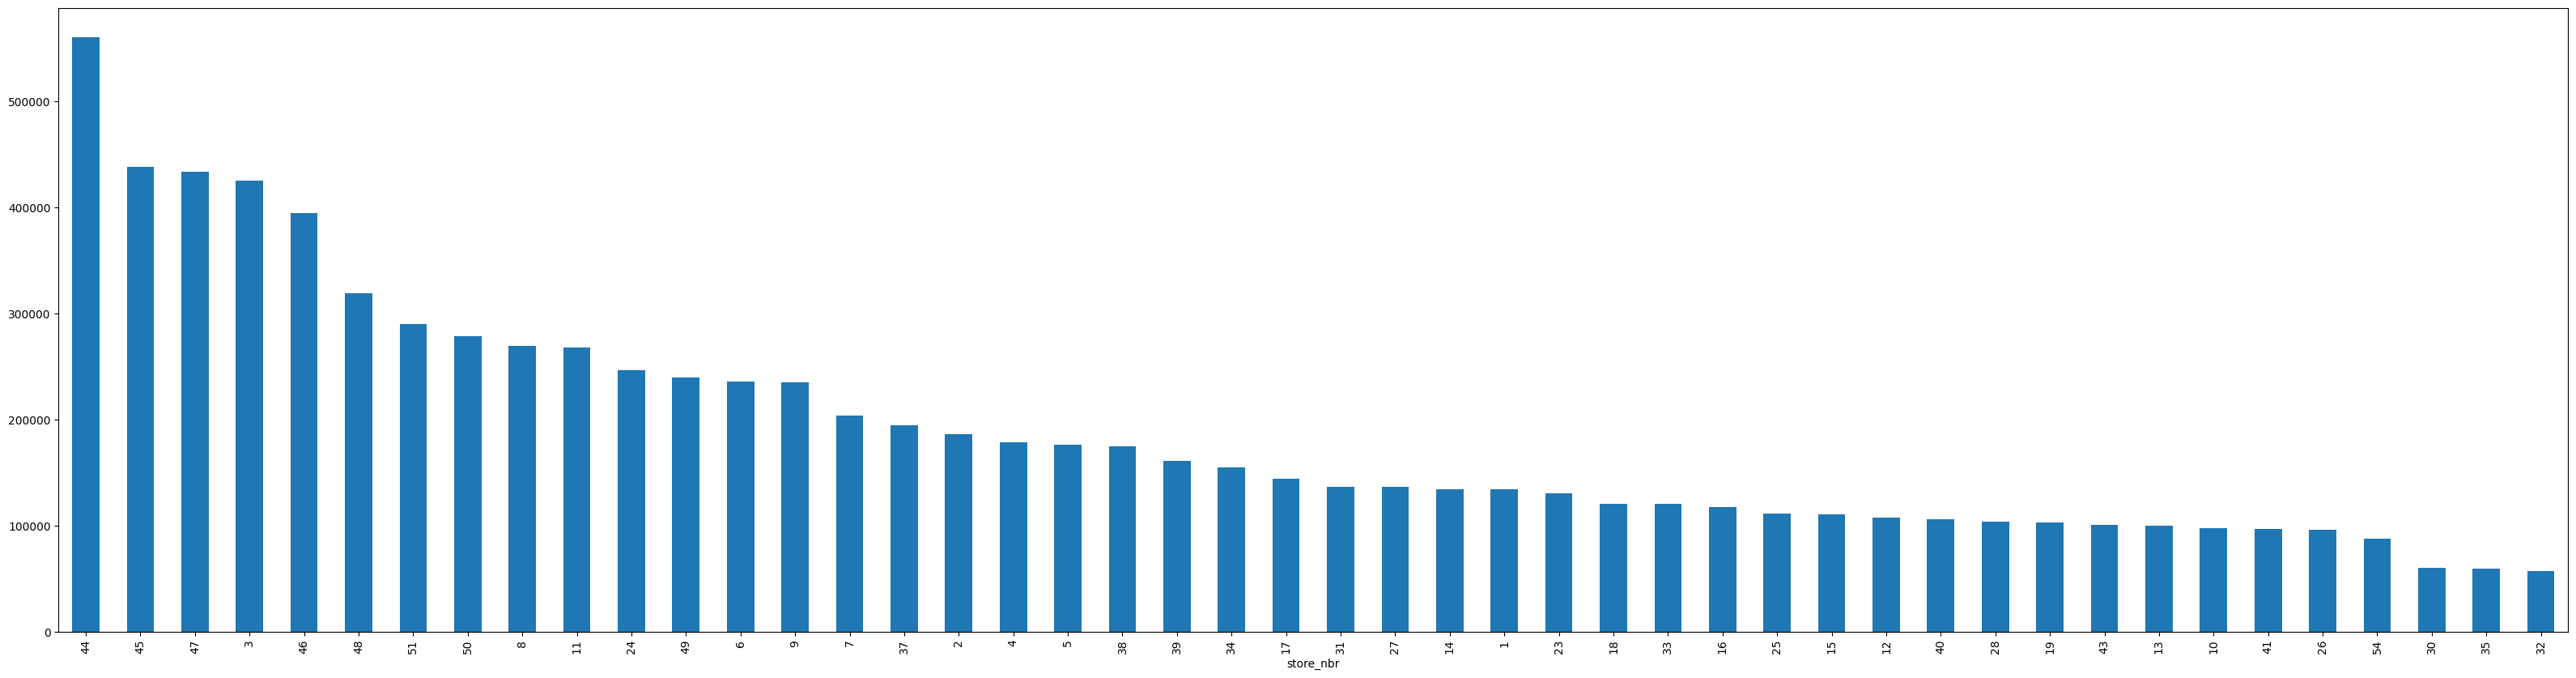

In [31]:
plt.figure(figsize=(40,10))
store_wise_sale.plot(kind='bar') #box, hist, line, 



## City, State
### Group by 

In [32]:
train['city_state'] = train['city'].astype(str) + ', ' + train['state'].astype(str)

In [33]:
city_state_wise_sale = train.groupby('city_state')['unit_sales'].sum().sort_values(ascending=False)

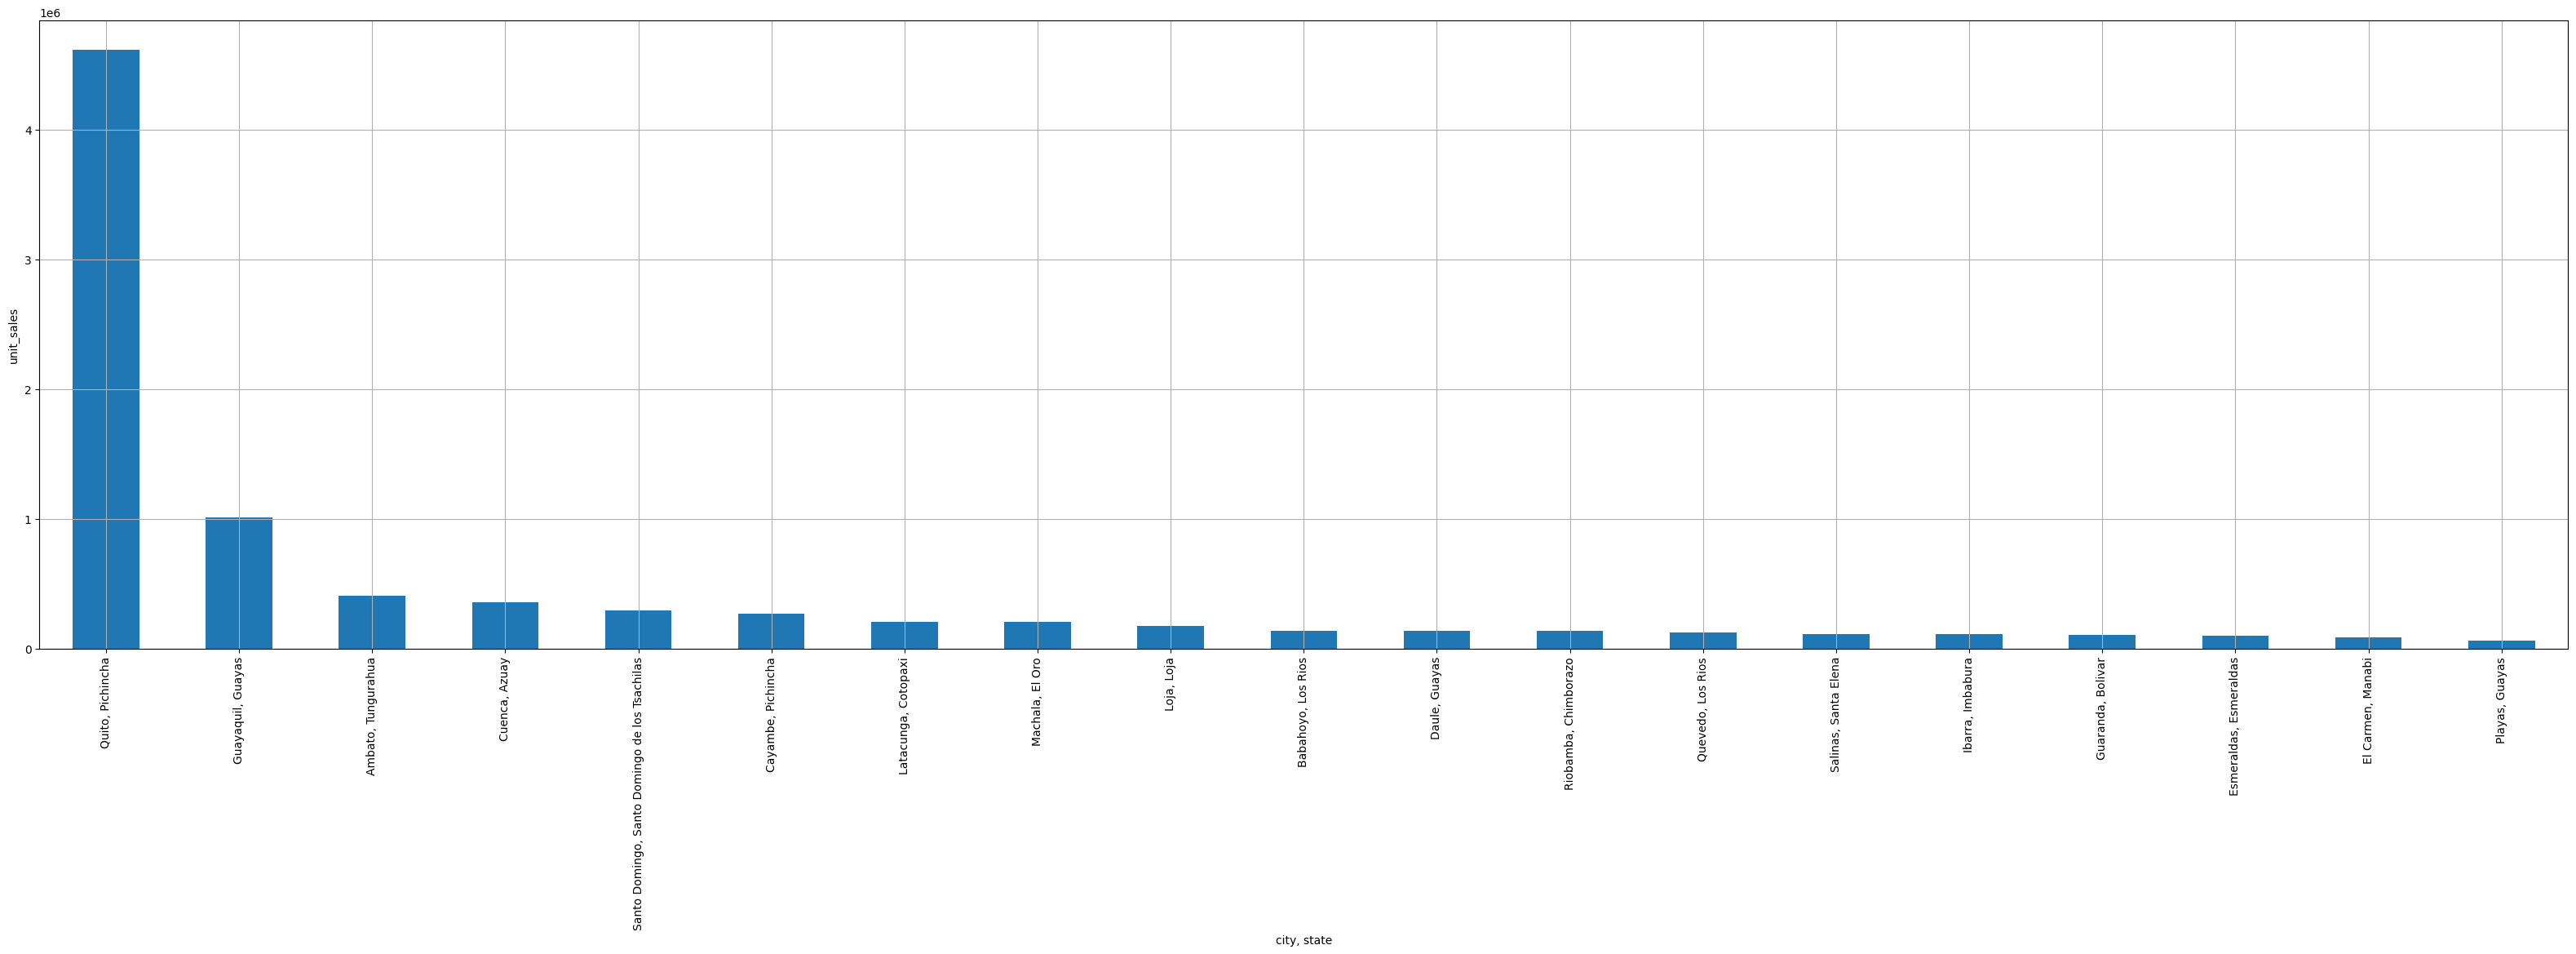

In [34]:
plt.figure(figsize=(40,10))
city_state_wise_sale.plot(kind='bar')
plt.xlabel('city, state')
plt.ylabel('unit_sales')
plt.grid()

## Sales by Day of the Week

### We must extract the day of the week from the date column before plotting anything

### Step 1: Make sure date column is datetime type
### and in my case it already done 

In [35]:
print(train['date'].dtypes)

datetime64[ns]


## Step 2: Create a new column for Day of the Week

In [36]:
train['day_of_week'] = train['date'].dt.dayofweek
day_map = {
    0:'Monday', 1:'Tuesday', 2:'Wednessday', 3:'Thursday', 
    4:'Friday', 5:'Satureday', 6:'Sunday'
}
train['day_name'] = train['day_of_week'].map(day_map)

In [37]:
day_wise_sale = train.groupby('day_name')['unit_sales'].sum().sort_values(ascending=False)

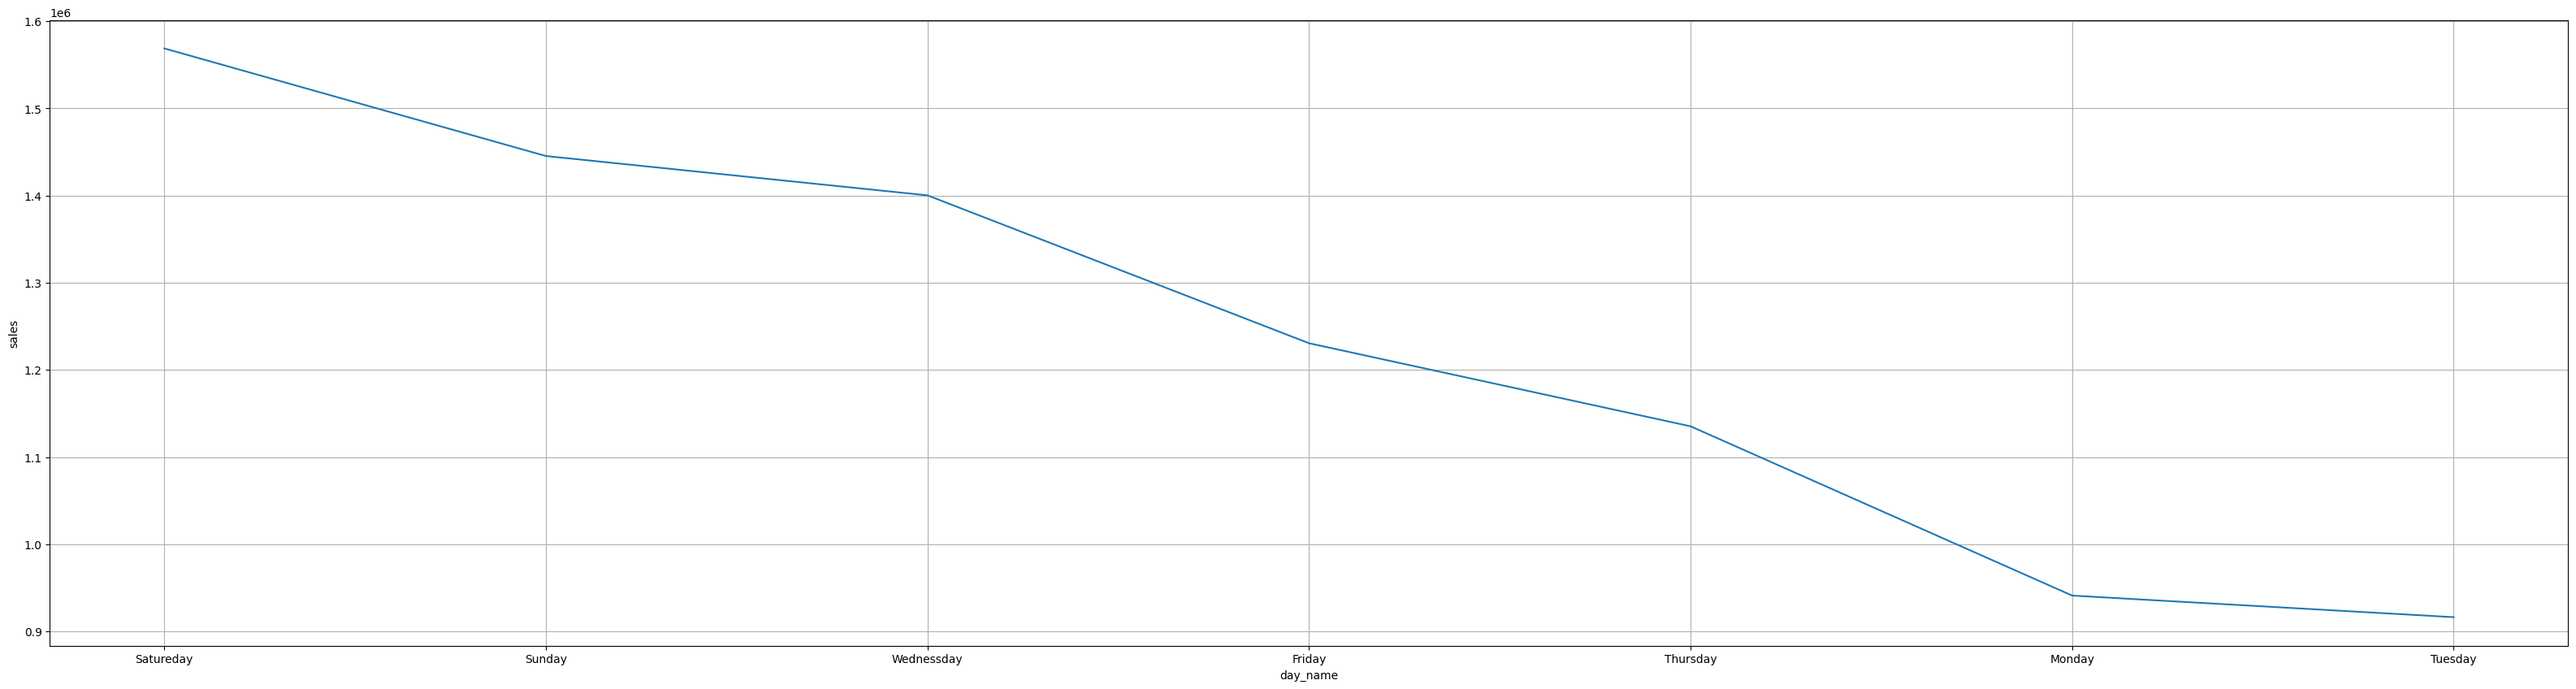

In [38]:
plt.figure(figsize=(40,10))
day_wise_sale.plot(kind='line')
plt.xlabel('day_name')
plt.ylabel('sales')
plt.grid()

# Test

## yha se bas tune copy kra hai

## Handling Outliers

##  Step 1: Detecting Outliers

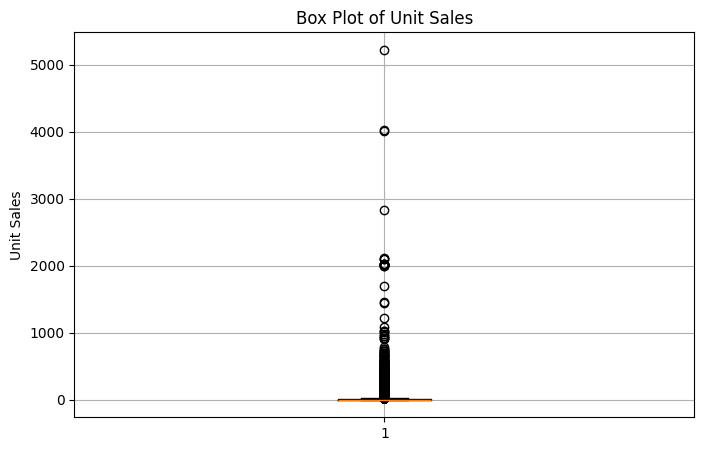

In [39]:

plt.figure(figsize=(8, 5))  # Make a nice size box
plt.boxplot(train['unit_sales'])  # Make the boxplot
plt.title("Box Plot of Unit Sales")  # Give it a name
plt.ylabel("Unit Sales")  # Label the side
plt.grid(True)  # Add dotted lines for better viewing
plt.show()  # Show the box!


In [40]:
Q1 = train['unit_sales'].quantile(0.25)
print(Q1)
Q3 = train['unit_sales'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = train[(train['unit_sales'] < lower_limit) | (train['unit_sales'] > upper_limit)]

# Step 6: Print how many outliers we found
print("Number of outliers found:", outliers.shape[0])


2.0
9.0
7.0
Lower limit: -8.5
Upper limit: 19.5
Number of outliers found: 95108


### How It Calculates:
#### [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


#### Let’s look at data.quantile(0.25)

#### Step 1: Formula used
#### Pandas uses this formula:

#### Position = (n - 1) * quantile
#### Where:

#### n = number of items = 10

#### quantile = 0.25 for 25%

#### So:
#### Position = (10 - 1) * 0.25 = 9 * 0.25 = 2.25

#### This means it needs the value between index 2 and 3.

#### Your data:

#### Index:  0   1   2   3   4   5   6   7   8   9
#### Value: 10  20  30  40  50  60  70  80  90 100

#### So:

#### Value at index 2 = 30

#### Value at index 3 = 40

#### 30 + (40 - 30) * 0.25 = 30 + 10 * 0.25 = 30 + 2.5 = **32.5**


## Drop the outliers

In [41]:
#  train = train[(train['unit_sales'] >= lower_limit) & (train['unit_sales'] <= upper_limit)]


This line is saying:

“Hey train box! Only keep the rows where the number of sales (unit_sales) is:

Bigger than or equal to lower_limit ✅

AND smaller than or equal to upper_limit ✅

Everything else? ✂️ Remove it!”

So now your toy box (train) only has the nicely sized toys.

## FIX the outliers

In [42]:
#import numpy as np
#train['unit_sales'] = np.clip(train['unit_sales'], lower_limit, upper_limit)


This line is saying:

“Look at every unit_sales value:

If it’s too small → change it to lower_limit 📏

If it’s too big → change it to upper_limit 📐

If it’s already fine → don’t touch it 😄”

## Save the changes

In [43]:
#train.to_csv("final_merge_datasets_5/final_merge_train_dataset.csv",index=False)

### END

## test

### Check for new categories

In [44]:
# e.g., item families in test but not in train
new_families = set(test['family']) - set(train['family'])
print("New families:", new_families)


New families: {'BABY CARE', 'LADIESWEAR', 'HOME AND KITCHEN I', 'BOOKS', 'PRODUCE', 'MAGAZINES', 'CELEBRATION', 'PET SUPPLIES', 'HOME CARE', 'PLAYERS AND ELECTRONICS', 'HOME AND KITCHEN II', 'SCHOOL AND OFFICE SUPPLIES'}


### Compare numeric distributions

Text(0.5, 1.0, 'Oil Price: Train vs Test')

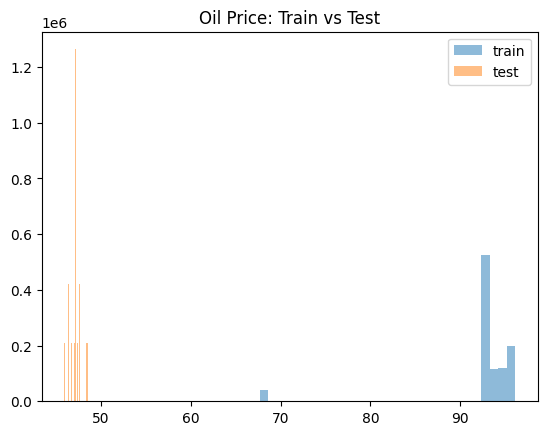

In [45]:
# oil price in train vs test
plt.hist(train['dcoilwtico'], bins=30, alpha=0.5, label='train')
plt.hist(test['dcoilwtico'],  bins=30, alpha=0.5, label='test')
plt.legend(); plt.title("Oil Price: Train vs Test")


In [46]:
test.to_csv("final_merge_datasets_5/final_merge_test_dataset.csv",index=False)
train.to_csv("final_merge_datasets_5/final_merge_train_dataset.csv",index=False)

In [47]:
test.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
onpromotion              bool
family                 object
class                   int64
perishable              int64
dcoilwtico            float64
city                 category
state                category
store_grade            object
cluster                 int64
dtype: object

In [48]:
train.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
item_nbr                 int64
unit_sales             float64
onpromotion               bool
Day_type              category
locale                category
locale_name           category
description           category
transferred               bool
family                category
class                    int64
perishable               int64
dcoilwtico             float64
city                  category
state                 category
store_grade             object
cluster                  int64
transactions             int64
city_state              object
day_of_week              int32
day_name                object
dtype: object